In [1]:
#load csv file into pandas.index as row labels and columns from first row of csv.
import pandas as pd
myData = pd.read_csv('bigml.csv')

In [2]:
#display the first 5 rows. You can use tail or sample(5).
myData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#display column summary as well as datatypes.
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
#descriptive statistics on your dataframe. includes percentile. excludes text columns.
myData.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#shows unique values in a column
myData.churn.unique()


array([False,  True])

In [6]:
myData['international plan'].unique()

array(['no', 'yes'], dtype=object)

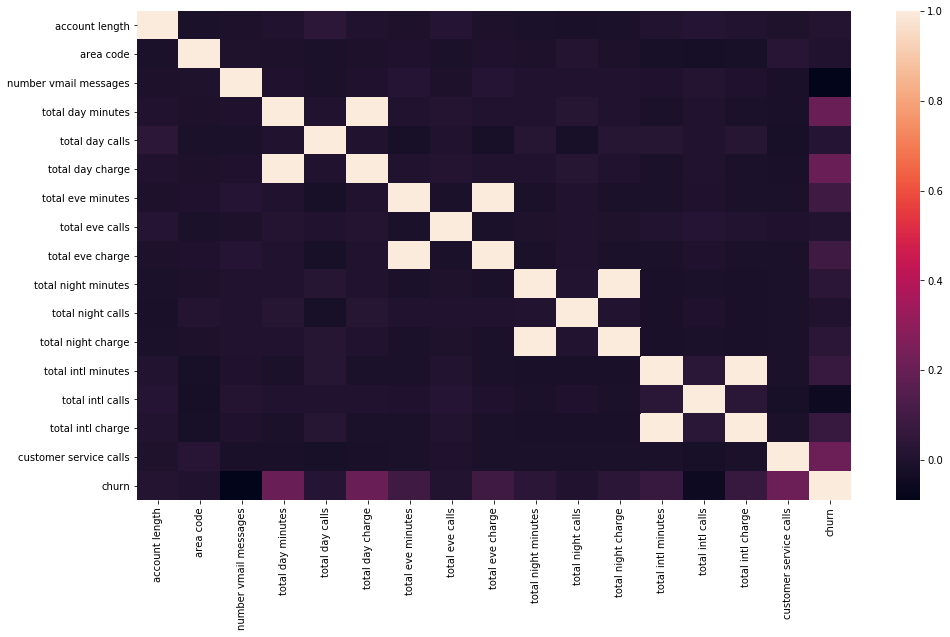

In [7]:
#2D plotting library. shows correlation between the columns in your dataframe. highest positive correlation is the brightest area.
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(myData.corr())

In [8]:
#fit_transform to transform text to numbers for use in the correlation table.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
myData['voice mail plan'] = le.fit_transform(myData['voice mail plan'])
myData['international plan'] = le.fit_transform(myData['international plan'])
myData['state'] = le.fit_transform(myData['state'])

In [9]:
#0 for NO and 1 for YES
myData['international plan'].unique()

array([0, 1], dtype=int64)

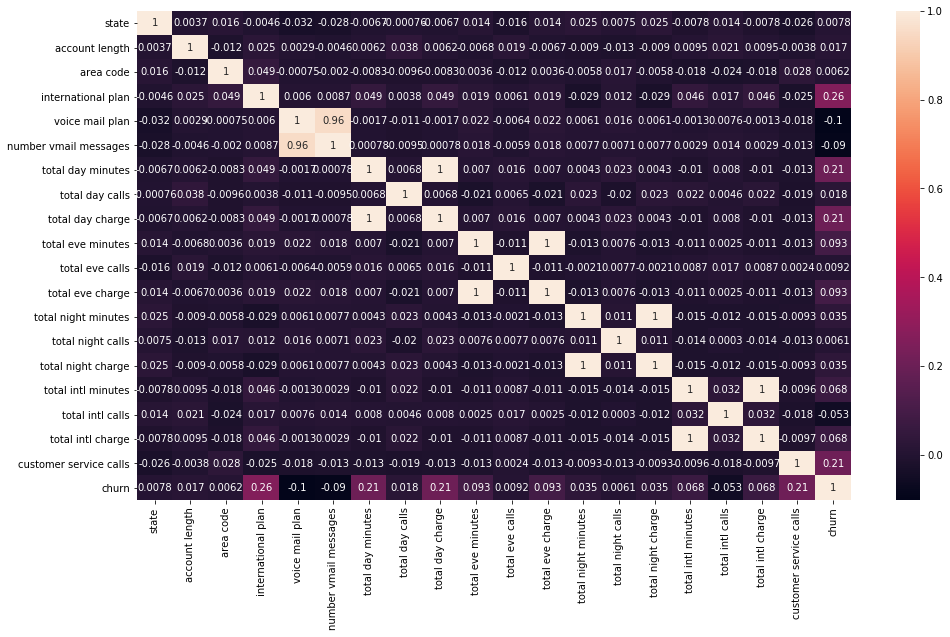

In [10]:
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(myData.corr(),annot=True)

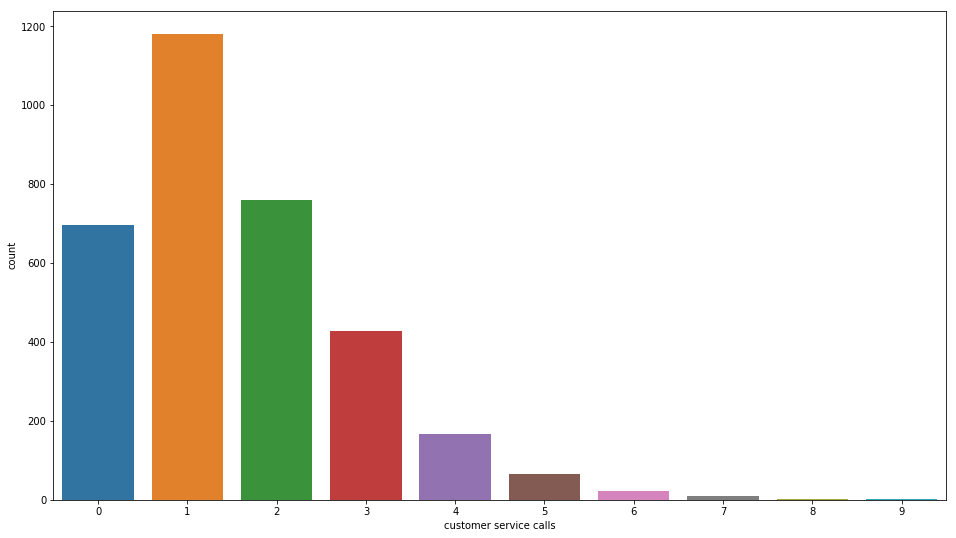

In [11]:
#map single series. shows count of observations.
se.countplot(x='customer service calls', data=myData)

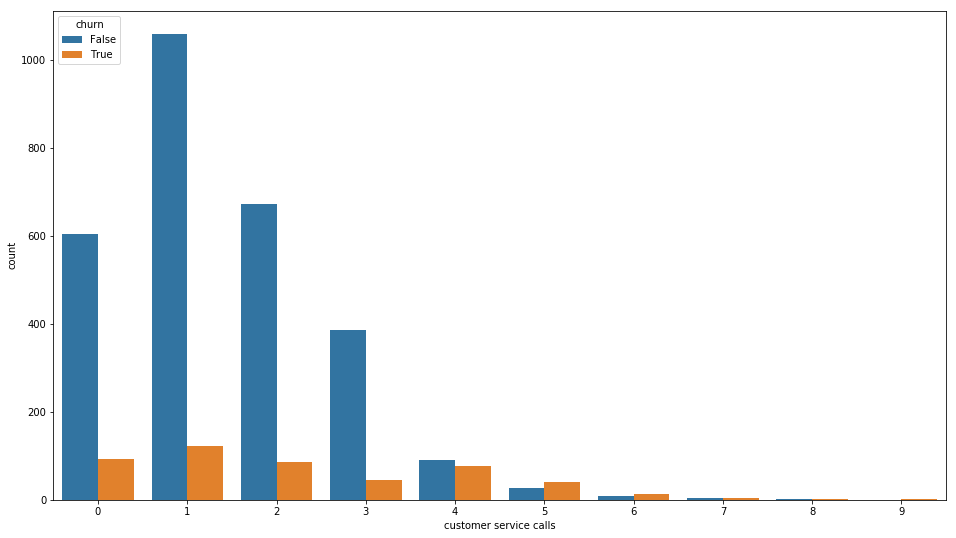

In [12]:
#mapping 2 series. Orange bar is churn. Customers who place calls are likely to churn.
se.countplot(x='customer service calls', hue='churn', data=myData)

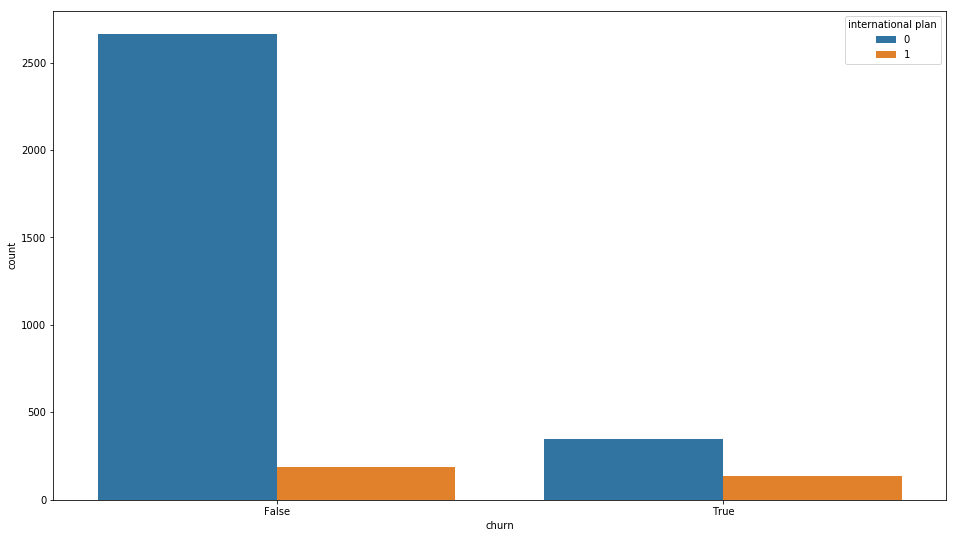

In [13]:
#huge churn for international plan subscribers
se.countplot(x='churn', hue='international plan', data=myData)

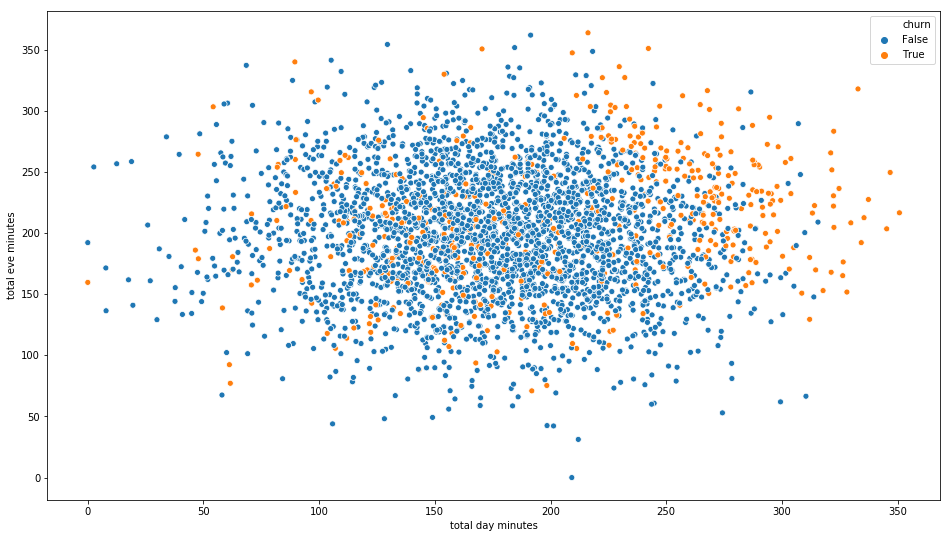

In [14]:
#clustering on the right side. higher churn with higher total minutes.
se.scatterplot(x='total day minutes',y='total eve minutes', hue='churn', data=myData)

In [15]:
#Axis means columns
myData=myData.drop(['phone number', 'area code', 'state'], axis=1)

In [16]:
#assign churn data into variable name label. This is the output/label column. myData contains the input/features columns.
labels = myData['churn']
myData = myData.drop(['churn'], axis=1)

In [17]:
#print (labels)

In [18]:
#removed unnecessary columns. no predictive value.
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
account length            3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dtypes: float64(8), int32(2), int64(7)
memory usage: 416.7 KB


In [19]:
#function to split arrays or matrices into random train and test subsets. labels would be churn. Supervised learning as x_test and y_test.
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(myData, labels, test_size=0.25)

In [20]:
#Classification example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“.
from sklearn.linear_model import SGDClassifier
linear = SGDClassifier()

In [21]:
#support vector machine
from sklearn.svm import LinearSVC
vector = LinearSVC()

In [22]:
#yes or no
from sklearn import tree
tree = tree.DecisionTreeClassifier()

In [23]:
from sklearn.neural_network import MLPClassifier
net = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(200, 10, 3), random_state=1)

In [24]:
#train classification models
linear.fit(X_train, Y_train)
vector.fit(X_train, Y_train)
tree.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
#train neural net
net.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 10, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
#predicting row 2 of myData.Client number 2 will not switch providers
print("Linear:", linear.predict([myData.loc[2]]))
print("SVM:", vector.predict([myData.loc[2]]))
print("Decision Tree:", tree.predict([myData.loc[2]]))
print("Neural Net:", net.predict([myData.loc[2]]))

Linear: [False]
SVM: [False]
Decision Tree: [False]
Neural Net: [False]


In [27]:
#loc[x]refers to one row. displays probability for each label.
net.predict_proba([myData.loc[2],myData.loc[301],myData.loc[1000]])

array([[0.99290686, 0.00709314],
       [0.92037223, 0.07962777],
       [0.8452998 , 0.1547002 ]])

In [28]:
#measure accuracy on the training set
print("Linear:", linear.score(X_train, Y_train))
print("SVM:", vector.score(X_train, Y_train))
print("Decision Tree:", tree.score(X_train, Y_train))
#print("XGBoost:", boost.score(X_train, Y_train))
print("Neural Net:", net.score(X_train, Y_train))

Linear: 0.8563425370148059
SVM: 0.8579431772709084
Decision Tree: 1.0
Neural Net: 0.8807523009203682


In [29]:
#measure accuracy on the testing set
print("Linear:", linear.score(x_test, y_test))
print("SVM:", vector.score(x_test, y_test))
print("Decision Tree:", tree.score(x_test, y_test))
#print("XGBoost:", boost.score(x_test, y_test))
print("Neural Net:", net.score(x_test, y_test))

Linear: 0.8513189448441247
SVM: 0.8489208633093526
Decision Tree: 0.9016786570743405
Neural Net: 0.8585131894484412


In [30]:
#trying to predict False and True for Churn
#Precision aka false positives - of all customers that labeled as churn, how many actually churned?
#recall aka False negatives - Of all the customers that truly churned, how many did we label correctly?
#f1 - score is the weighted average of precision and recall
#support - number of samples of the true response that lie in that class
from sklearn.metrics import classification_report
y_tree = tree.predict(x_test)
y_net = net.predict(x_test)
print("DT", classification_report(y_test, y_tree))
print("------------------------------------------------------")
print("NN", classification_report(y_test, y_net))

DT               precision    recall  f1-score   support

       False       0.95      0.93      0.94       708
        True       0.65      0.74      0.69       126

   micro avg       0.90      0.90      0.90       834
   macro avg       0.80      0.83      0.82       834
weighted avg       0.91      0.90      0.90       834

------------------------------------------------------
NN               precision    recall  f1-score   support

       False       0.88      0.97      0.92       708
        True       0.57      0.25      0.35       126

   micro avg       0.86      0.86      0.86       834
   macro avg       0.73      0.61      0.64       834
weighted avg       0.83      0.86      0.83       834

